# MEI Introduction to Data Science: 
# Lesson 2 - Activity 1

* [Introduction](#Introduction)
 - [Problem](#Problem)
 - [Importing libraries and data](#Importing-libraries-and-data)
 - [Checkpoint 1](#Checkpoint-1)
* [Pre-processing the data](#Pre-processing-the-data)
 - [Removing characters and converting to a string](#Removing-characters-and-converting-to-a-string)
 - [Creating a derived feature](#Creating-a-derived-feature)
 - [Checkpoint 2](#Checkpoint-2)
* [Exploring the data](#Exploring-the-data)
 - [Creating grouped box plots](#Creating-grouped-box-plots)
 - [Finding grouped statistics](#Finding-grouped-statistics)
* [Communicating the results](#Communicating-the-results)
 - [Checkpoint 3](#Checkpoint-3)

 
# Introduction

This activity show you how to clean data, create derived features and group the data for analysis.

The activity uses the data from the OCR large data set which gives the methods of travel to work arranged by English and Welsh local authorities for 2001 and 2011. For more information about the data see the short video at: https://mei.org.uk/introduction-to-data-science/large-data-sets/

## Problem
***Are people more likely to cycle to work or drive to work in different parts of the country?***

To answer this question you could compare the means and standard deviations of the number of people driving and cycling to work for different regions.

## Importing libraries and data
Initially the data for 2011 will be imported.
> Run the code in the boxes below to import the libraries and the 2011 data.

In [6]:
# import pandas for data analysis
import pandas as pd 

# import seaborn for visualisations
import seaborn as sns

In [7]:
# importing the data
travel_2011_data = pd.read_csv('../input/ocrlds/OCR-lds-travel-2011.csv')

# inspecting the dataset to check that it has imported correctly
travel_2011_data

,geography code,Region,LA,In employment,Work at home,"Underground, tram",Train,Bus,Taxi,Motorcycle,Driving a car,Passenger in a car,Bicycle,On foot,Other,Not in employment
0,E06000047,North East,County Durham,"227,894","20,652",323,"1,865","13,732","1,401","1,038","146,644","17,362","2,205","21,490","1,182","155,902"
1,E06000005,North East,Darlington,"49,014","4,180",33,828,"3,380",403,191,"28,981","3,337","1,151","6,284",246,"27,621"
2,E08000020,North East,Gateshead,"91,877","6,383","4,270",705,"13,909",453,364,"50,236","5,830","1,314","7,966",447,"56,202"
3,E06000001,North East,Hartlepool,"37,767","2,473",33,469,"2,556",673,175,"22,863","3,157",706,"4,305",357,"29,037"
4,E06000002,North East,Middlesbrough,"54,547","3,337",44,698,"4,868",902,195,"31,155","4,639","1,375","6,769",565,"46,004"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,W06000016,Wales,"Rhondda, Cynon, Taff","99,327","6,778",61,"4,114","3,932",217,445,"67,154","7,995",441,"7,836",354,"72,720"
344,W06000011,Wales,Swansea,"102,793","8,228",100,883,"5,791",636,610,"66,912","7,585","1,485","9,997",566,"74,178"
345,W06000014,Wales,The Vale of Glamorgan,"58,978","5,886",83,"3,450","1,681",251,328,"38,079","3,177",998,"4,701",344,"32,838"
346,W06000020,Wales,Torfaen,"40,261","2,582",30,475,"1,892",308,301,"28,057","3,074",326,"3,089",127,"25,846"


This data has imported all the numerical features with the comma separators for thousands. This is problematic as they will be interpreted as text features (or "strings") and therefore it will not be possible to calculate statistics such as the mean or the standard deviation. 

> Use the `info()` command you learnt in lesson 1 to explore the data types

*Reminder: the format for this command in lesson 2 was* `weather_data.info()`

In [8]:
# explore the data types
travel_2011_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   geography code      348 non-null    object
 1   Region              348 non-null    object
 2   LA                  348 non-null    object
 3   In employment       348 non-null    object
 4   Work at home        348 non-null    object
 5   Underground, tram   348 non-null    object
 6   Train               348 non-null    object
 7   Bus                 348 non-null    object
 8   Taxi                348 non-null    object
 9   Motorcycle          348 non-null    object
 10  Driving a car       348 non-null    object
 11  Passenger in a car  348 non-null    object
 12  Bicycle             348 non-null    object
 13  On foot             348 non-null    object
 14  Other               348 non-null    object
 15  Not in employment   348 non-null    object
dtypes: object(16)
memory usage

## Checkpoint 1
> * You should see that the data type for all features is `object` but looking at the data shows that some fields have numerical values. Give a reason why the numerical features are not showing as `int64` or `float64`. *Hint: look at the characters in the entries.* 

# Pre-processing the data
The `In employment` feature has been imported as an `object`. This means that Pandas will treat it like a text feature (or *string*). You can see the effect of this if you use `.describe()` on the feature.

> Run the code below to attempt to find the statistics for `In employment`.

In [10]:
travel_2011_data['In employment'].describe()

count         348
unique        348
top       227,894
freq            1
Name: In employment, dtype: object

## Removing characters and converting to a string
The values as they are stored have two problems that need to be addressed:
* The strings contain commas for some of the values to separate thousands
* They are being stored as strings and not numbers

These two issues need to be corrected in order. The code below addresses both problems in a single line: 

* To remove the commas you can use the string replace command `.str.replace` to replace any commas with an empty string.
* To then change it to a number you can use `.astype('int')` so pandas will interpret it as an integer.

> Run the code below to create a new feature (`In employment value`) that has the `In employment` data formatted as numbers.

In [12]:
# any commas in the In employment features are removed by replacing them with an empty string
travel_2011_data['In employment value'] = travel_2011_data['In employment'].str.replace(',', '').astype('int')

# check the data set
travel_2011_data

,geography code,Region,LA,In employment,Work at home,"Underground, tram",Train,Bus,Taxi,Motorcycle,Driving a car,Passenger in a car,Bicycle,On foot,Other,Not in employment,In employment value
0,E06000047,North East,County Durham,"227,894","20,652",323,"1,865","13,732","1,401","1,038","146,644","17,362","2,205","21,490","1,182","155,902",227894
1,E06000005,North East,Darlington,"49,014","4,180",33,828,"3,380",403,191,"28,981","3,337","1,151","6,284",246,"27,621",49014
2,E08000020,North East,Gateshead,"91,877","6,383","4,270",705,"13,909",453,364,"50,236","5,830","1,314","7,966",447,"56,202",91877
3,E06000001,North East,Hartlepool,"37,767","2,473",33,469,"2,556",673,175,"22,863","3,157",706,"4,305",357,"29,037",37767
4,E06000002,North East,Middlesbrough,"54,547","3,337",44,698,"4,868",902,195,"31,155","4,639","1,375","6,769",565,"46,004",54547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,W06000016,Wales,"Rhondda, Cynon, Taff","99,327","6,778",61,"4,114","3,932",217,445,"67,154","7,995",441,"7,836",354,"72,720",99327
344,W06000011,Wales,Swansea,"102,793","8,228",100,883,"5,791",636,610,"66,912","7,585","1,485","9,997",566,"74,178",102793
345,W06000014,Wales,The Vale of Glamorgan,"58,978","5,886",83,"3,450","1,681",251,328,"38,079","3,177",998,"4,701",344,"32,838",58978
346,W06000020,Wales,Torfaen,"40,261","2,582",30,475,"1,892",308,301,"28,057","3,074",326,"3,089",127,"25,846",40261


You can then use the describe command to check that this has worked and the data can now be analysed.

> Run the code below to find the statistics for `In employment value`.

In [13]:
# find the statistics with describe
travel_2011_data['In employment value'].describe()

count       348.000000
mean      76225.103448
std       48561.022902
min        1311.000000
25%       46185.500000
50%       59950.500000
75%       96379.750000
max      423691.000000
Name: In employment value, dtype: float64

The code in the two boxes below repeats this pre-processing for the Bicycle feature.

> Run the code to remove the commas and reformat `Bicycle` as numeric.
>
> Then, copy the code into the following boxes and change it so that it does the same for the `Driving in a car` feature.

In [14]:
# any commas in the Bicycle feature are removed by replacing them with an empty string and then converting to the int type
travel_2011_data['Bicycle value'] = travel_2011_data['Bicycle'].str.replace(',', '').astype('int')

# display the data to check
travel_2011_data

,geography code,Region,LA,In employment,Work at home,"Underground, tram",Train,Bus,Taxi,Motorcycle,Driving a car,Passenger in a car,Bicycle,On foot,Other,Not in employment,In employment value,Bicycle value
0,E06000047,North East,County Durham,"227,894","20,652",323,"1,865","13,732","1,401","1,038","146,644","17,362","2,205","21,490","1,182","155,902",227894,2205
1,E06000005,North East,Darlington,"49,014","4,180",33,828,"3,380",403,191,"28,981","3,337","1,151","6,284",246,"27,621",49014,1151
2,E08000020,North East,Gateshead,"91,877","6,383","4,270",705,"13,909",453,364,"50,236","5,830","1,314","7,966",447,"56,202",91877,1314
3,E06000001,North East,Hartlepool,"37,767","2,473",33,469,"2,556",673,175,"22,863","3,157",706,"4,305",357,"29,037",37767,706
4,E06000002,North East,Middlesbrough,"54,547","3,337",44,698,"4,868",902,195,"31,155","4,639","1,375","6,769",565,"46,004",54547,1375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,W06000016,Wales,"Rhondda, Cynon, Taff","99,327","6,778",61,"4,114","3,932",217,445,"67,154","7,995",441,"7,836",354,"72,720",99327,441
344,W06000011,Wales,Swansea,"102,793","8,228",100,883,"5,791",636,610,"66,912","7,585","1,485","9,997",566,"74,178",102793,1485
345,W06000014,Wales,The Vale of Glamorgan,"58,978","5,886",83,"3,450","1,681",251,328,"38,079","3,177",998,"4,701",344,"32,838",58978,998
346,W06000020,Wales,Torfaen,"40,261","2,582",30,475,"1,892",308,301,"28,057","3,074",326,"3,089",127,"25,846",40261,326


In [15]:
# find the statistics with describe
travel_2011_data['Bicycle value'].describe()

count      348.000000
mean      2130.410920
std       2403.754267
min         80.000000
25%        786.250000
50%       1358.000000
75%       2473.250000
max      17257.000000
Name: Bicycle value, dtype: float64

In [17]:
# any commas in the Driving a car feature are removed by replacing them with an empty string and then converting to the int type
travel_2011_data['Driving a car value'] = travel_2011_data['Driving a car'].str.replace(',', '').astype('int')

# display the data to check
travel_2011_data

,geography code,Region,LA,In employment,Work at home,"Underground, tram",Train,Bus,Taxi,Motorcycle,Driving a car,Passenger in a car,Bicycle,On foot,Other,Not in employment,In employment value,Bicycle value,Driving a car value
0,E06000047,North East,County Durham,"227,894","20,652",323,"1,865","13,732","1,401","1,038","146,644","17,362","2,205","21,490","1,182","155,902",227894,2205,146644
1,E06000005,North East,Darlington,"49,014","4,180",33,828,"3,380",403,191,"28,981","3,337","1,151","6,284",246,"27,621",49014,1151,28981
2,E08000020,North East,Gateshead,"91,877","6,383","4,270",705,"13,909",453,364,"50,236","5,830","1,314","7,966",447,"56,202",91877,1314,50236
3,E06000001,North East,Hartlepool,"37,767","2,473",33,469,"2,556",673,175,"22,863","3,157",706,"4,305",357,"29,037",37767,706,22863
4,E06000002,North East,Middlesbrough,"54,547","3,337",44,698,"4,868",902,195,"31,155","4,639","1,375","6,769",565,"46,004",54547,1375,31155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,W06000016,Wales,"Rhondda, Cynon, Taff","99,327","6,778",61,"4,114","3,932",217,445,"67,154","7,995",441,"7,836",354,"72,720",99327,441,67154
344,W06000011,Wales,Swansea,"102,793","8,228",100,883,"5,791",636,610,"66,912","7,585","1,485","9,997",566,"74,178",102793,1485,66912
345,W06000014,Wales,The Vale of Glamorgan,"58,978","5,886",83,"3,450","1,681",251,328,"38,079","3,177",998,"4,701",344,"32,838",58978,998,38079
346,W06000020,Wales,Torfaen,"40,261","2,582",30,475,"1,892",308,301,"28,057","3,074",326,"3,089",127,"25,846",40261,326,28057


In [19]:
# find the statistics with describe
travel_2011_data['Driving a car value'].describe()

count       348.000000
mean      41519.445402
std       26166.289241
min         134.000000
25%       26818.750000
50%       34836.000000
75%       49022.500000
max      223632.000000
Name: Driving a car value, dtype: float64

## Creating a derived feature
The data in this dataset show the numbers of people in each local authority that use each type of transport as their primary means of getting to work. However, this doesn't take into account the size of the local authority: local authorities with more people living in them will generally have greater numbers across all the categories. To aid comparison between different sized local authorities it is useful to consider the proportion of people who work in each local authority that use each type of transport (expressed as a percentage).

The proportion of people who cycle is a *derived feature*: it is not part of the original dataset but it can be derived from other values, in this case the number who cycle divided by the total number of people in work.

> Run the code in the two boxes below to add the Bicycle percent feature and check that it has added correctly to the data set.

In [20]:
# The percentage is calculated and stored in a new feature: Bicycle percent
travel_2011_data['Bicycle percent']=travel_2011_data['Bicycle value']/travel_2011_data['In employment value']*100

# display the data
travel_2011_data

,geography code,Region,LA,In employment,Work at home,"Underground, tram",Train,Bus,Taxi,Motorcycle,Driving a car,Passenger in a car,Bicycle,On foot,Other,Not in employment,In employment value,Bicycle value,Driving a car value,Bicycle percent
0,E06000047,North East,County Durham,"227,894","20,652",323,"1,865","13,732","1,401","1,038","146,644","17,362","2,205","21,490","1,182","155,902",227894,2205,146644,0.967555
1,E06000005,North East,Darlington,"49,014","4,180",33,828,"3,380",403,191,"28,981","3,337","1,151","6,284",246,"27,621",49014,1151,28981,2.348309
2,E08000020,North East,Gateshead,"91,877","6,383","4,270",705,"13,909",453,364,"50,236","5,830","1,314","7,966",447,"56,202",91877,1314,50236,1.430173
3,E06000001,North East,Hartlepool,"37,767","2,473",33,469,"2,556",673,175,"22,863","3,157",706,"4,305",357,"29,037",37767,706,22863,1.869357
4,E06000002,North East,Middlesbrough,"54,547","3,337",44,698,"4,868",902,195,"31,155","4,639","1,375","6,769",565,"46,004",54547,1375,31155,2.520762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,W06000016,Wales,"Rhondda, Cynon, Taff","99,327","6,778",61,"4,114","3,932",217,445,"67,154","7,995",441,"7,836",354,"72,720",99327,441,67154,0.443988
344,W06000011,Wales,Swansea,"102,793","8,228",100,883,"5,791",636,610,"66,912","7,585","1,485","9,997",566,"74,178",102793,1485,66912,1.444651
345,W06000014,Wales,The Vale of Glamorgan,"58,978","5,886",83,"3,450","1,681",251,328,"38,079","3,177",998,"4,701",344,"32,838",58978,998,38079,1.692156
346,W06000020,Wales,Torfaen,"40,261","2,582",30,475,"1,892",308,301,"28,057","3,074",326,"3,089",127,"25,846",40261,326,28057,0.809717


> Copy the code into the following box and change it so that it adds a column for `Driving a car percent`. 

In [26]:
# The percentage is calculated and stored in a new feature: Driving a car percent
travel_2011_data['Driving a car percent']=travel_2011_data['Driving a car value']/travel_2011_data['In employment value']*100

# display the data
travel_2011_data

,geography code,Region,LA,In employment,Work at home,"Underground, tram",Train,Bus,Taxi,Motorcycle,...,Bicycle,On foot,Other,Not in employment,In employment value,Bicycle value,Driving a car value,Bicycle percent,Driving percent,Driving a car percent
0,E06000047,North East,County Durham,"227,894","20,652",323,"1,865","13,732","1,401","1,038",...,"2,205","21,490","1,182","155,902",227894,2205,146644,0.967555,64.347460,64.347460
1,E06000005,North East,Darlington,"49,014","4,180",33,828,"3,380",403,191,...,"1,151","6,284",246,"27,621",49014,1151,28981,2.348309,59.128004,59.128004
2,E08000020,North East,Gateshead,"91,877","6,383","4,270",705,"13,909",453,364,...,"1,314","7,966",447,"56,202",91877,1314,50236,1.430173,54.677449,54.677449
3,E06000001,North East,Hartlepool,"37,767","2,473",33,469,"2,556",673,175,...,706,"4,305",357,"29,037",37767,706,22863,1.869357,60.536977,60.536977
4,E06000002,North East,Middlesbrough,"54,547","3,337",44,698,"4,868",902,195,...,"1,375","6,769",565,"46,004",54547,1375,31155,2.520762,57.115882,57.115882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,W06000016,Wales,"Rhondda, Cynon, Taff","99,327","6,778",61,"4,114","3,932",217,445,...,441,"7,836",354,"72,720",99327,441,67154,0.443988,67.609009,67.609009
344,W06000011,Wales,Swansea,"102,793","8,228",100,883,"5,791",636,610,...,"1,485","9,997",566,"74,178",102793,1485,66912,1.444651,65.093927,65.093927
345,W06000014,Wales,The Vale of Glamorgan,"58,978","5,886",83,"3,450","1,681",251,328,...,998,"4,701",344,"32,838",58978,998,38079,1.692156,64.564753,64.564753
346,W06000020,Wales,Torfaen,"40,261","2,582",30,475,"1,892",308,301,...,326,"3,089",127,"25,846",40261,326,28057,0.809717,69.687787,69.687787


## Checkpoint 2
> When would you use the raw number of people using a type of transport and when would you use a percentage?

# Exploring the data
## Creating grouped box plots 

It is useful to see the boxplots for these features. The code in the two boxes below will generate the boxplots grouped by region. Plotting charts will be explored in more detail in lesson 3.

> Run the code below to create the box plots

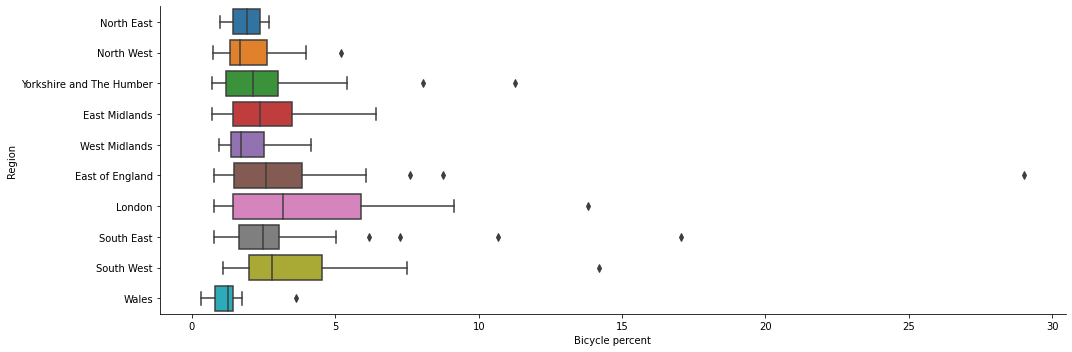

In [24]:
# plot a boxplot for Bicycle percent grouped by Region
sns.catplot(data=travel_2011_data, kind='box', x='Bicycle percent', y='Region', aspect=3);

> Copy the code into the following box and change it so that it creates the box plots for the `Driving a car percent` feature.

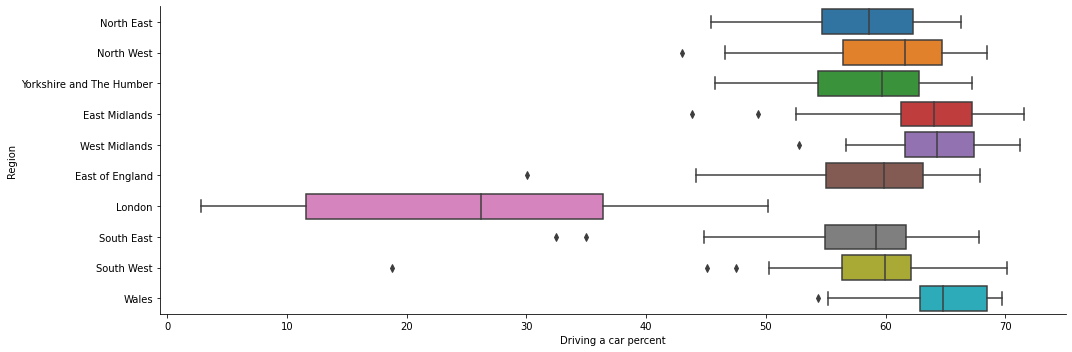

In [27]:
# plot a boxplot for Driving a car percent grouped by Region
sns.catplot(data=travel_2011_data, kind='box', x='Driving a car percent', y='Region', aspect=3);

## Finding grouped statistics
The data in this dataset is listed by local authority and region. Pandas contains a built-in command: `groupby` that allows for operations to be performed on different groups.

> Run the code below which calculates the statistics for the data grouped by region

In [28]:
# Calculate the grouped statistics 
travel_2011_data.groupby('Region')['Bicycle percent'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Midlands,40.0,2.565248,1.322726,0.695719,1.432276,2.376607,3.487501,6.414127
East of England,47.0,3.394563,4.196098,0.782353,1.482311,2.572620,3.823957,29.034103
London,33.0,3.944235,2.956267,0.762950,1.446805,3.188173,5.895932,13.823847
North East,12.0,1.887826,0.555232,0.967555,1.425589,1.906304,2.371743,2.700800
North West,39.0,2.044099,0.970439,0.719337,1.329630,1.684351,2.613873,5.182839
South East,67.0,2.822476,2.389765,0.767704,1.629108,2.471014,3.038931,17.068489
South West,37.0,3.478315,2.452868,1.073650,1.996195,2.774898,4.526953,14.187643
Wales,22.0,1.212334,0.678267,0.318738,0.804178,1.262385,1.440975,3.628128
West Midlands,30.0,1.969199,0.833030,0.958164,1.345436,1.712875,2.498941,4.165586


> Copy the code into the following box and change it so that it calculates the statistics for the `Driving a car percent` feature

In [29]:
# Calculate the grouped statistics 
travel_2011_data.groupby('Region')['Driving a car percent'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Midlands,40.0,63.640476,5.630927,43.840997,61.281150,64.077594,67.172184,71.592950
East of England,47.0,58.602323,6.812719,30.080590,55.028711,59.904408,63.099707,67.897907
London,33.0,25.736251,13.529946,2.822835,11.572855,26.162569,36.374756,50.156574
North East,12.0,58.380433,5.768552,45.389031,54.707467,58.617750,62.325148,66.335713
North West,39.0,60.554009,5.713200,42.989635,56.464410,61.647549,64.691973,68.451068
South East,67.0,57.812723,6.422159,32.443738,54.911547,59.156477,61.674659,67.779163
South West,37.0,57.983175,8.498956,18.764302,56.343559,59.907032,62.094230,70.139825
Wales,22.0,64.397803,4.571011,54.360520,62.870038,64.829340,68.431844,69.730417
West Midlands,30.0,64.117194,4.514067,52.781862,61.650387,64.267060,67.418247,71.200870


# Communicating the results
Use the measures calculated to answer the orginal problem: 

***Are people more likely to cycle to work or drive to work in different parts of the country?***
## Checkpoint 3
> * Which regions have the highest/lowest proportion of people cycling or driving to work? Which regions have the most variation?
> * What local factors might affect the proportion of people cycling or driving to work? For example the geography, types of people who live there or other factors. 